In [ ]:
import torch
from torch import nn
from imutils import build_montages
import pickle
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import tqdm
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
import random


import torchvision.transforms as transforms
from torchvision.datasets import MNIST


# Loading MNIST Dataset And Assigning it Into A Dataholder

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])
torch.manual_seed(0)
dataloader = DataLoader(
    MNIST('.', download=True, transform=transform),
    batch_size=128,
    shuffle=True)


In [ ]:
z_dim=100
ch=1 #number of channels

In [ ]:
def get_noise_seed(z_dim,cur_batch_size):
  torch.manual_seed(12)
  return torch.randn(cur_batch_size,z_dim)



In [ ]:

def get_noise(z_dim,cur_batch_size):
  return torch.randn(cur_batch_size,z_dim)

#**Generator**

In [ ]:
class Generator(nn.Module):


  def __init__(self, z_dim=10, nodes=64):
      super(Generator, self).__init__()
      self.z_dim = z_dim
      self.gen = nn.Sequential(
          # input =1x1
          nn.ConvTranspose2d(z_dim, nodes*4 , 3 , stride=2),
          nn.BatchNorm2d(nodes*4),
          nn.ReLU(),
          # output = 4x4

          nn.ConvTranspose2d(nodes*4 , nodes*2 , 4, stride=1),
          nn.BatchNorm2d(nodes*2 ),
          nn.ReLU(),
          # output =7x7

          nn.ConvTranspose2d(nodes*2, nodes , 3, stride=2),
          nn.BatchNorm2d(nodes),
          nn.ReLU(),
          # output =10x10

          nn.ConvTranspose2d(nodes, ch, 4, stride=2),
          nn.Tanh(),
          # output =28x28

      )

  def unsqueeze_noise(self, noise):
    return noise.view(len(noise), self.z_dim, 1, 1)

  def forward(self, noise):
    x = self.unsqueeze_noise(noise)
    return self.gen(x)

#**Discriminator**

In [ ]:
class Discriminator(nn.Module):

    def __init__(self, nodes=16):
        super(Discriminator, self).__init__()
        self.disc = nn.Sequential(
            
          nn.Conv2d(ch, nodes, 4, stride=2),
          nn.BatchNorm2d(nodes),
          nn.LeakyReLU(0.2),
           # output =13x13
          nn.Conv2d(nodes, nodes *2, 4, stride=2),
          nn.BatchNorm2d(nodes *2),
          nn.LeakyReLU(0.2),
          # output =5x5
          nn.Conv2d(nodes *2, 1, 4, stride=2),
          # output =1x1
        )

    def forward(self, image):
        disc_pred = self.disc(image)
        return disc_pred.view(len(disc_pred), -1)

##Loss Function, Optimizers ,and Initializing Weights:

In [ ]:
criterion = nn.BCEWithLogitsLoss()
z_dim = 100
display_step = 60
batch_size = 128
# A learning rate of 0.0002 works well on DCGAN
lr = 0.0002

beta_1 = 0.5 
beta_2 = 0.999

gen = Generator(z_dim)
gen_opt = torch.optim.Adam(gen.parameters(), lr=lr, betas=(beta_1, beta_2))
disc = Discriminator() 
disc_opt = torch.optim.Adam(disc.parameters(), lr=lr, betas=(beta_1, beta_2))

def weights_init(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.ConvTranspose2d):
        torch.nn.init.normal_(m.weight, 0.0, 0.02)
    if isinstance(m, nn.BatchNorm2d):
        torch.nn.init.normal_(m.weight, 0.0, 0.02)
        torch.nn.init.constant_(m.bias, 0)
gen = gen.apply(weights_init)
disc = disc.apply(weights_init)

In [ ]:
disc

Discriminator(
  (disc): Sequential(
    (0): Conv2d(1, 16, kernel_size=(4, 4), stride=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2)
    (3): Conv2d(16, 32, kernel_size=(4, 4), stride=(2, 2))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Conv2d(32, 1, kernel_size=(4, 4), stride=(2, 2))
  )
)

In [ ]:
gen

Generator(
  (gen): Sequential(
    (0): ConvTranspose2d(100, 256, kernel_size=(3, 3), stride=(2, 2))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(1, 1))
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=(2, 2))
    (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): ConvTranspose2d(64, 1, kernel_size=(4, 4), stride=(2, 2))
    (10): Tanh()
  )
)

In [ ]:
def show_tensor_images(image_tensor, num_images=25, size=(3, 28, 64)):

    image_tensor = (image_tensor + 1) / 2
    image_unflat = image_tensor.detach()
    image_grid = make_grid(image_unflat[:num_images], nrow=5)
    plt.imshow(image_grid.permute(1, 2, 0).squeeze())
    plt.show()
    return image_grid.permute(1, 2, 0).squeeze()

#**Training**

In [ ]:
loss_g=[]
loss_d=[]

x=torch.empty(0,152,152,3)
cur_step = 0
mean_generator_loss = 0
mean_discriminator_loss = 0


Step 21060: Generator loss: 1.354656582884491, discriminator loss: 0.43365487953027093


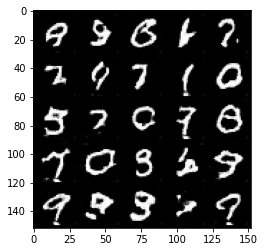

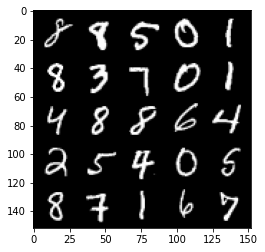

Step 21120: Generator loss: 0.5930036291480063, discriminator loss: 0.42325648069381716


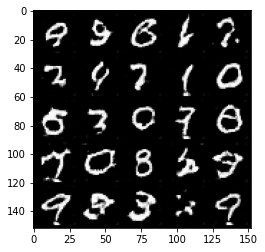

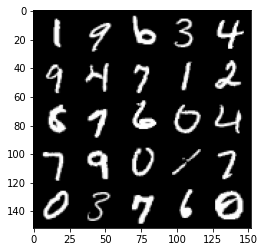

Step 21180: Generator loss: 0.30077242789169156, discriminator loss: 0.41836833407481516


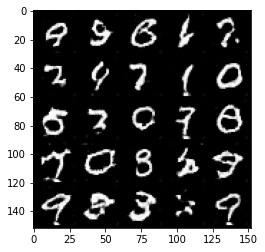

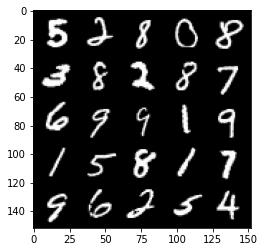

Step 21240: Generator loss: 0.19636994271228708, discriminator loss: 0.40946473280588774


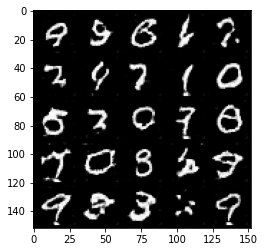

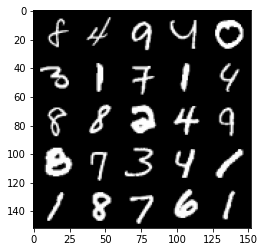

Step 21300: Generator loss: 0.16914469059556725, discriminator loss: 0.40874172151088706


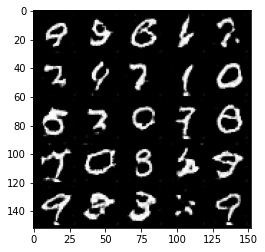

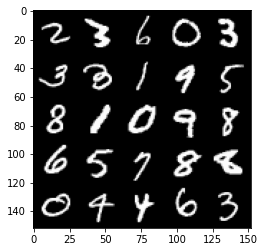

Step 21360: Generator loss: 0.13111517659078042, discriminator loss: 0.41400274236996965


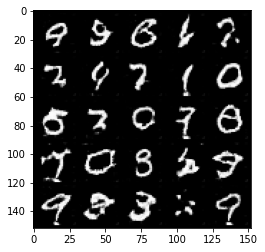

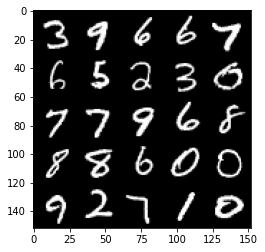

Step 21420: Generator loss: 0.12490093999852737, discriminator loss: 0.3969576254487038


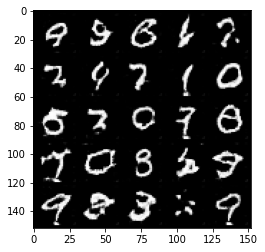

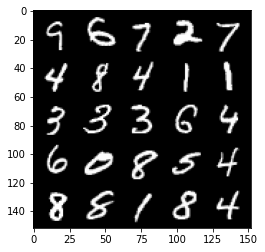

Step 21480: Generator loss: 0.13322855494916439, discriminator loss: 0.3955971692999205


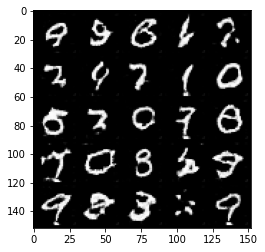

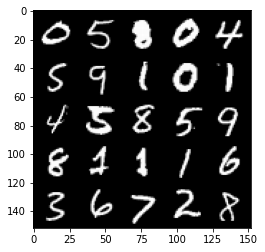

In [ ]:
n_epochs = 1
for epoch in range(n_epochs):
    # Dataloader returns the batches
    for real,_ in tqdm(dataloader):
        cur_batch_size = len(real)
        ## Update discriminator ##
        disc_opt.zero_grad()
        fake_noise = get_noise(z_dim,cur_batch_size)
        fake = gen(fake_noise)
        disc_fake_pred = disc(fake.detach())
        disc_fake_loss = criterion(disc_fake_pred, torch.zeros_like(disc_fake_pred))
        disc_real_pred = disc(real)
        disc_real_loss = criterion(disc_real_pred, torch.ones_like(disc_real_pred))
        disc_loss = (disc_fake_loss + disc_real_loss) / 2

        # Keep track of the average discriminator loss
        mean_discriminator_loss += disc_loss.item() / display_step
        # Update gradients
        disc_loss.backward(retain_graph=True)
        # Update optimizer
        disc_opt.step()

        ## Update generator ##
        gen_opt.zero_grad()
        fake_noise_2 = get_noise(z_dim,cur_batch_size)
        fake_2 = gen(fake_noise_2)
        disc_fake_pred = disc(fake_2)
        gen_loss = criterion(disc_fake_pred, torch.ones_like(disc_fake_pred))
        gen_loss.backward()
        gen_opt.step()

        # Keep track of the average generator loss
        mean_generator_loss += gen_loss.item() / display_step


        loss_g += [gen_loss.item()]
        loss_d += [disc_loss.item()]
        ## Visualization code ##
        
        if cur_step % 60 == 0 and cur_step > 0:
            print(f"Step {cur_step}: Generator loss: {mean_generator_loss}, discriminator loss: {mean_discriminator_loss}")
            t=show_tensor_images(gen(get_noise_seed(100,64)))
            show_tensor_images(real)
            x=torch.cat((t.reshape(1,152,152,3),x),dim=0)
            mean_generator_loss = 0
            mean_discriminator_loss = 0
        cur_step += 1


#**Creating a Video of the Training Process:**

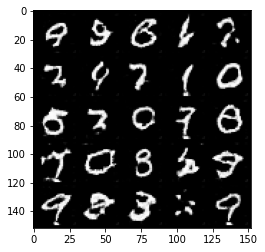

In [ ]:
import matplotlib.animation as animation
fig = plt.figure() 

ims = []
for j in range(len(x)-1,-1,-1):
    im = plt.imshow(x[j],animated=True)
    ims.append([im])
anim  = animation.ArtistAnimation(fig, ims, interval=60, blit=True, repeat_delay=1000,repeat = True)

anim.save('generate_number.mp4')
plt.show()

#**Plotting The Loss:**

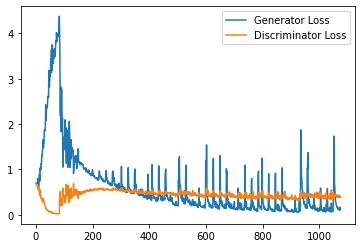

In [ ]:
step_bins = 20
num_examples = (len(loss_g) // step_bins) * step_bins
plt.plot(
        range(num_examples // step_bins), 
        torch.Tensor(loss_g[:num_examples]).view(-1, step_bins).mean(1),
        label="Generator Loss"
    )
plt.plot(
        range(num_examples // step_bins), 
        torch.Tensor(loss_d[:num_examples]).view(-1, step_bins).mean(1),
        label="Discriminator Loss"
    )
plt.legend()
plt.show()

##more results:

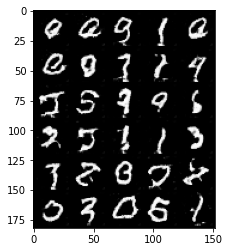

In [ ]:
torch.manual_seed(54)
noise=torch.randn(64,100)
fake = gen(noise)
show_tensor_images(fake,30)
xasd=3+3


#Save the generator Model

In [ ]:
torch.save(gen, "gen.pt")